<h1 style='color: #C9C9C9'>Machine Learning with Python<img style="float: right; margin-top: 0;" width="240" src="../../Images/cf-logo.png" /></h1> 
<p style='color: #C9C9C9'>&copy; Coding Fury 2022 - all rights reserved</p>

<hr style='color: #C9C9C9' />

# Part 1

Read JamesBond.csv into a Pandas Dataframe. 

Find correlations and use Simple Linear Regression to make predictions about the next Bond Movie. Assume a 2028 release date.

Use Matplotlib to find pairs of columns that show a linear relationship. 

I'm going to theorise that the number of kills has increased over the years. Let's start by putting that to the test by plotting Year vs Total_Kills. 



In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
bond_df = pd.read_csv('../../Data/JamesBond.csv')
bond_df

,Year,Movie,Bond,US_Gross,US_Adj,World_Gross,World_Adj,Budget,Budget_Adj,Film_Length,Avg_User_IMDB,Avg_User_Rtn_Tom,Conquests,Martinis,BJB,Kills_Bond,Kills_Others,Top_100
0,1962,Dr. No,Sean Connery,16067035,123517,59567035,457928,1000,7688,110,7.3,7.7,3,2,1,4,8,0
1,1963,From Russia with Love,Sean Connery,24800000,188161,78900000,598624,2000,15174,115,7.5,8.0,4,0,0,11,16,0
2,1964,Goldfinger,Sean Connery,51100000,382699,124900000,935404,3000,22468,110,7.8,8.4,2,1,2,9,68,1
3,1965,Thunderball,Sean Connery,63600000,468754,141200000,1040693,9000,66333,130,7.0,6.8,3,0,0,20,90,1
4,1967,You Only Live Twice,Sean Connery,43100000,299591,111600000,775740,9500,66035,117,6.9,6.3,3,1,0,21,175,1
5,1969,On Her Majesty's Secret Service,George Lazenby,22800000,144234,82000000,518736,8000,50608,142,6.8,6.7,3,1,2,5,37,0
6,1971,Diamonds Are Forever,Sean Connery,43800000,251083,116000000,664969,7200,41274,120,6.7,6.3,1,0,1,7,42,1
7,1973,Live and Let Die,Roger Moore,35400000,185105,161800000,846046,7000,36603,121,6.8,5.9,3,0,1,8,5,1
8,1974,The Man with the Golden Gun,Roger Moore,21000000,98894,97600000,459623,7000,32965,125,6.7,5.1,2,0,2,1,5,0
9,1977,The Spy Who Loved Me,Roger Moore,46800000,179297,185400000,710290,14000,53636,125,7.1,6.8,3,1,1,31,116,1


In [3]:
bond_df.dtypes

Year                  int64
Movie                object
Bond                 object
US_Gross              int64
US_Adj                int64
World_Gross           int64
World_Adj             int64
Budget                int64
Budget_Adj            int64
Film_Length           int64
Avg_User_IMDB       float64
Avg_User_Rtn_Tom    float64
Conquests             int64
Martinis              int64
BJB                   int64
Kills_Bond            int64
Kills_Others          int64
Top_100               int64
dtype: object

In [4]:
bond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              24 non-null     int64  
 1   Movie             24 non-null     object 
 2   Bond              24 non-null     object 
 3   US_Gross          24 non-null     int64  
 4   US_Adj            24 non-null     int64  
 5   World_Gross       24 non-null     int64  
 6   World_Adj         24 non-null     int64  
 7   Budget            24 non-null     int64  
 8   Budget_Adj        24 non-null     int64  
 9   Film_Length       24 non-null     int64  
 10  Avg_User_IMDB     24 non-null     float64
 11  Avg_User_Rtn_Tom  24 non-null     float64
 12  Conquests         24 non-null     int64  
 13  Martinis          24 non-null     int64  
 14  BJB               24 non-null     int64  
 15  Kills_Bond        24 non-null     int64  
 16  Kills_Others      24 non-null     int64  
 17 

In [5]:
bond_df['Kills_Total'] = bond_df['Kills_Bond'] + bond_df['Kills_Others']
bond_df

,Year,Movie,Bond,US_Gross,US_Adj,World_Gross,World_Adj,Budget,Budget_Adj,Film_Length,Avg_User_IMDB,Avg_User_Rtn_Tom,Conquests,Martinis,BJB,Kills_Bond,Kills_Others,Top_100,Kills_Total
0,1962,Dr. No,Sean Connery,16067035,123517,59567035,457928,1000,7688,110,7.3,7.7,3,2,1,4,8,0,12
1,1963,From Russia with Love,Sean Connery,24800000,188161,78900000,598624,2000,15174,115,7.5,8.0,4,0,0,11,16,0,27
2,1964,Goldfinger,Sean Connery,51100000,382699,124900000,935404,3000,22468,110,7.8,8.4,2,1,2,9,68,1,77
3,1965,Thunderball,Sean Connery,63600000,468754,141200000,1040693,9000,66333,130,7.0,6.8,3,0,0,20,90,1,110
4,1967,You Only Live Twice,Sean Connery,43100000,299591,111600000,775740,9500,66035,117,6.9,6.3,3,1,0,21,175,1,196
5,1969,On Her Majesty's Secret Service,George Lazenby,22800000,144234,82000000,518736,8000,50608,142,6.8,6.7,3,1,2,5,37,0,42
6,1971,Diamonds Are Forever,Sean Connery,43800000,251083,116000000,664969,7200,41274,120,6.7,6.3,1,0,1,7,42,1,49
7,1973,Live and Let Die,Roger Moore,35400000,185105,161800000,846046,7000,36603,121,6.8,5.9,3,0,1,8,5,1,13
8,1974,The Man with the Golden Gun,Roger Moore,21000000,98894,97600000,459623,7000,32965,125,6.7,5.1,2,0,2,1,5,0,6
9,1977,The Spy Who Loved Me,Roger Moore,46800000,179297,185400000,710290,14000,53636,125,7.1,6.8,3,1,1,31,116,1,147


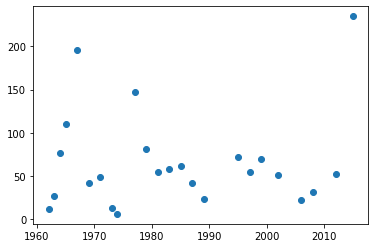

In [7]:
import matplotlib.pyplot as plt
plt.scatter(bond_df['Year'],bond_df['Kills_Total'])

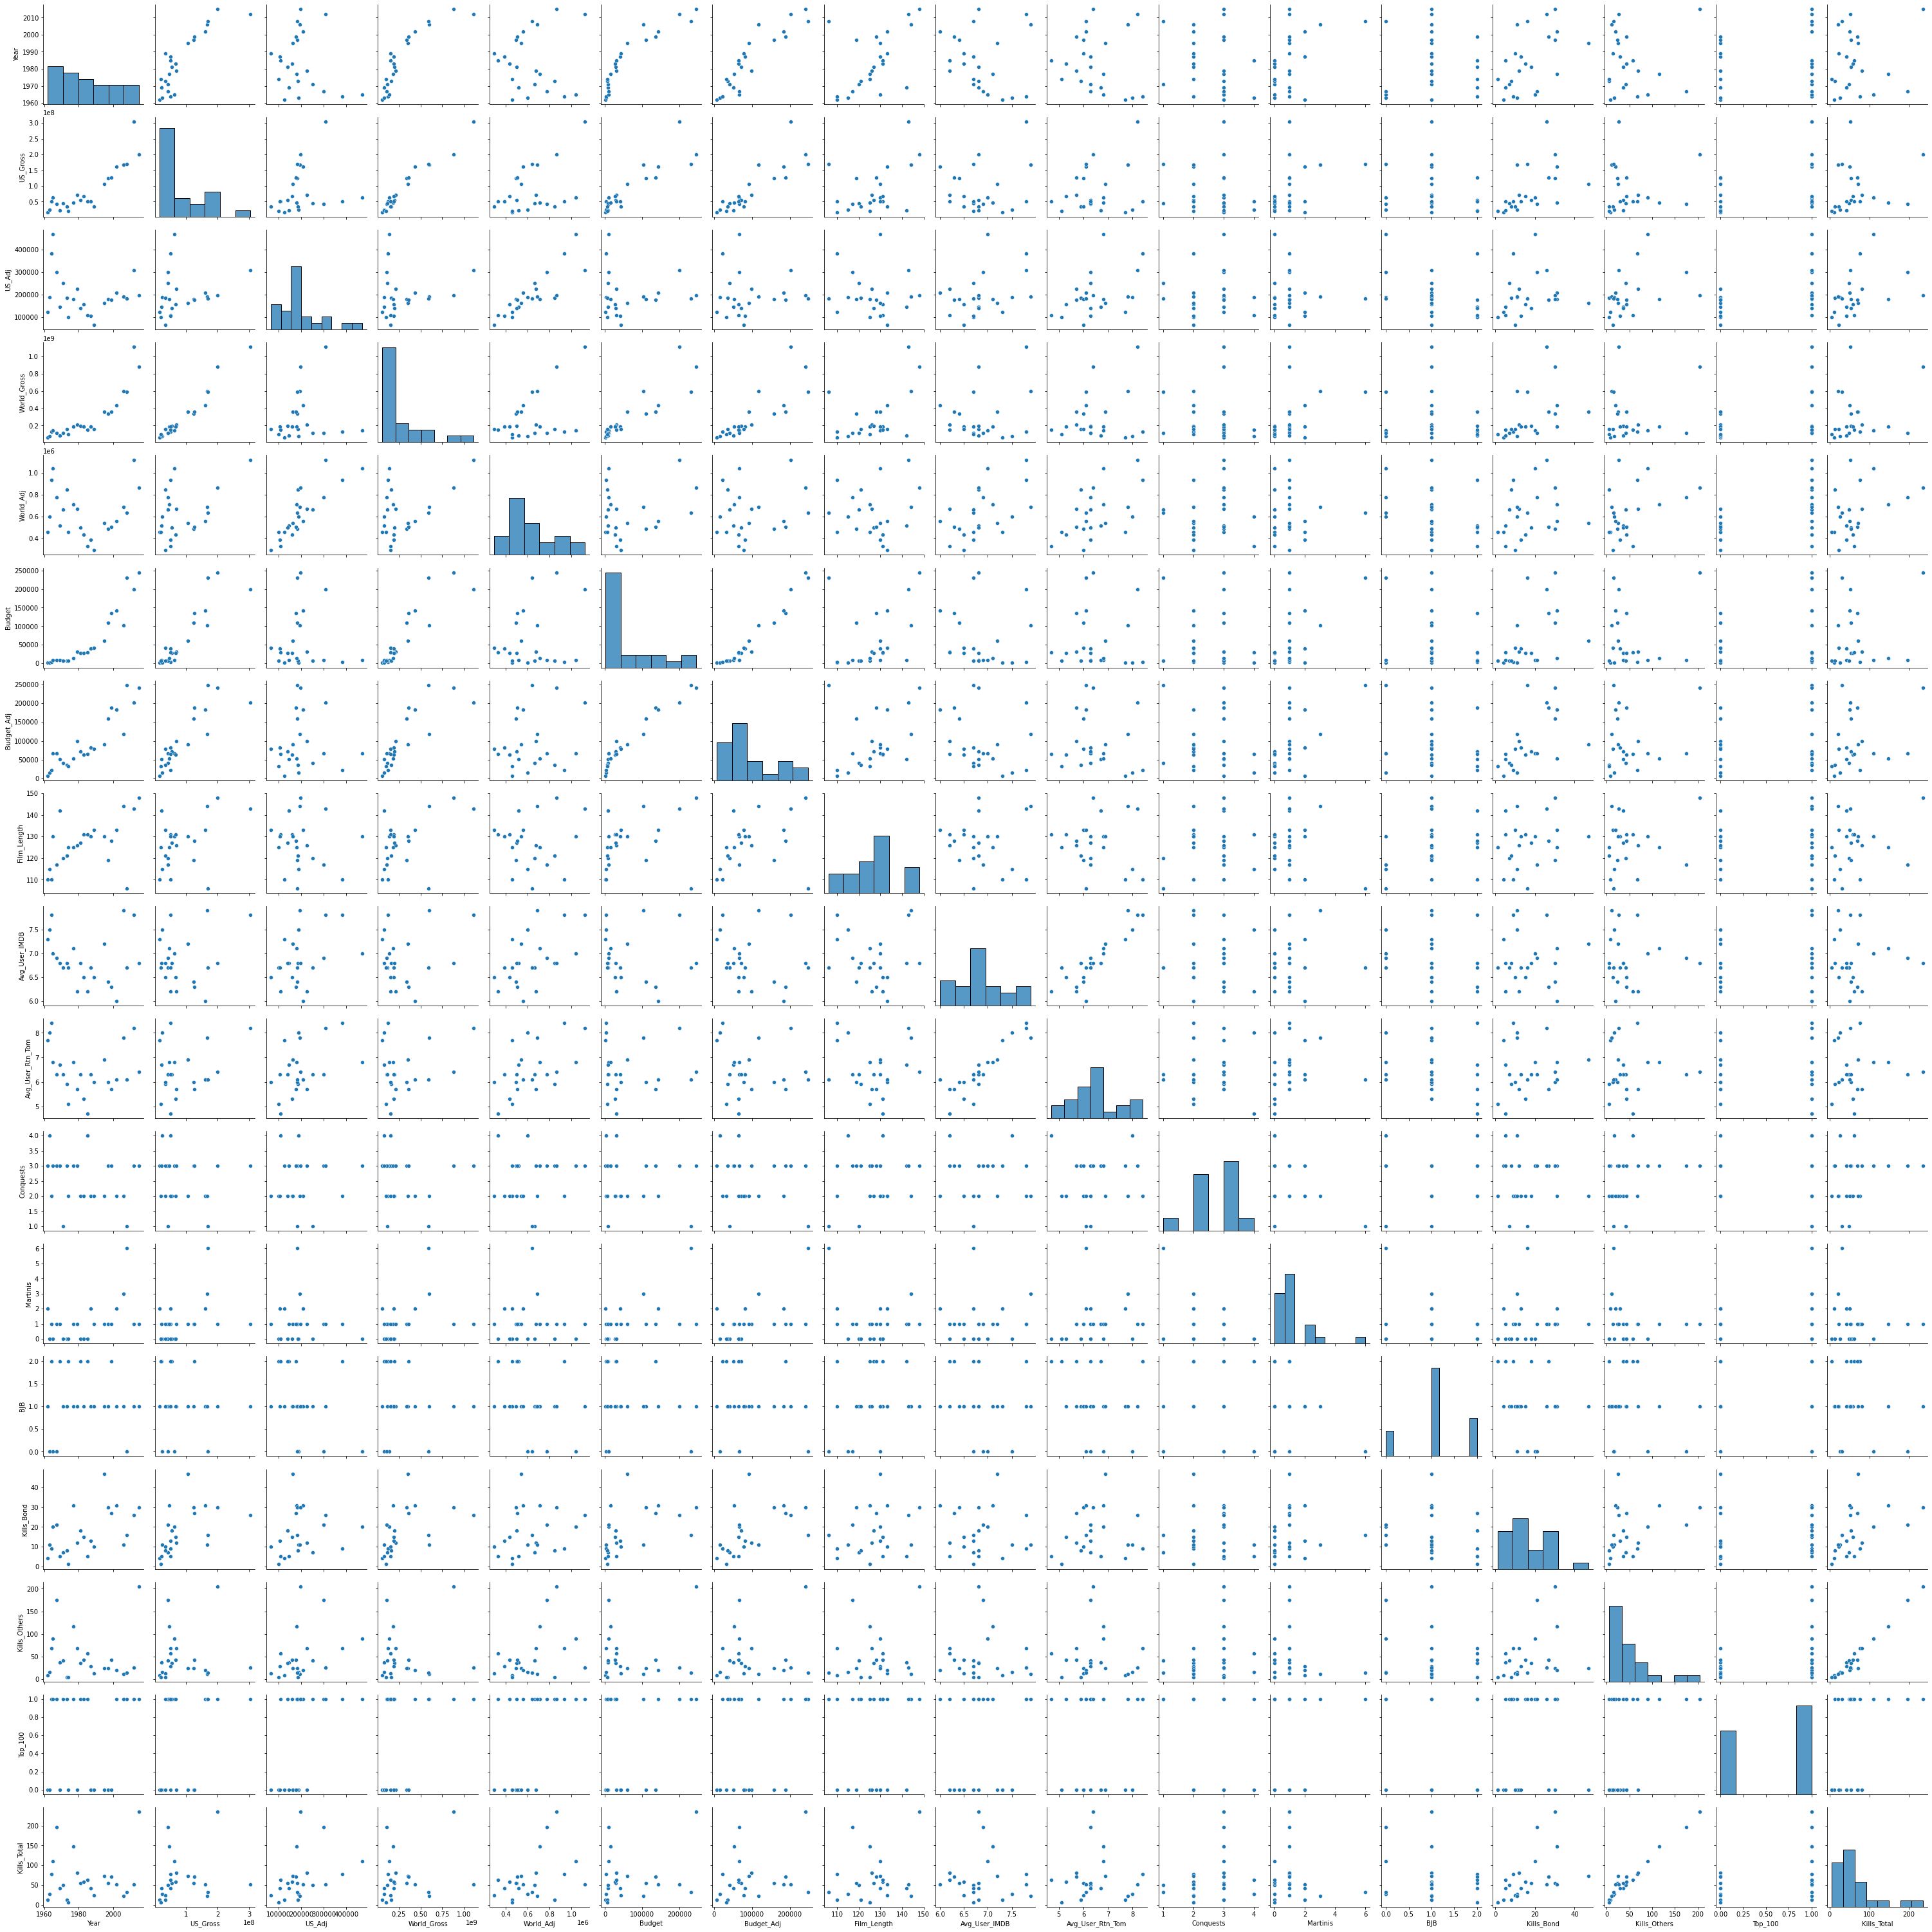

In [8]:
import seaborn as sns

sns.pairplot(bond_df)


# Part 2


1. Project budget required in 2028
1. Draw a line of best fit for Year vs budget_adj
1. Project film length for 2028
1. Draw a line of best fit for Year vs Film_Length


